<a href="https://colab.research.google.com/github/mebirtukan/EyeMovementEventDetectionAlgorithms/blob/main/I_VT_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import  TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score
from pprint import pprint
import pathlib
import os


In [8]:
CWD = pathlib.Path(os.path.abspath(""))
DATA_DIR = CWD / 'data'
print(DATA_DIR)

c:\Users\Ythat\Desktop\GazeFixation\Evaluation-of-eye-movement-event-detection-algorithms\data


In [ ]:
!wget www.kasprowski.pl/datasets/events.zip
!unzip events.zip > xx

In [9]:
def openfile(filename):
  mat = loadmat(filename)
  mdata = mat['ETdata']
  mtype = mdata.dtype
  ndata = {n: mdata[n][0,0] for n in mtype.names}
  data_headline = ndata['pos']
  data_headline = data_headline[0]
  data_raw = ndata['pos']
  pdata = pd.DataFrame(data_raw,columns=data_headline)
  df=pd.DataFrame(pdata)
  if 1.0 not in df:
    return [],[]
  df[1.0]=df[1.0].astype(int)
  #t=pdata.iloc[:, 0].values maybe we shoud use it...
  x=pdata.iloc[:, 3:5].values
  y=pdata.iloc[:, 5].values
  print("File",filename,"opened")
  return x ,y

In [40]:
# we don't use it here for now
def open_list_of_files(files_to_load):
  samples = []
  labels =[]
  for my_file in files_to_load:
    print(my_file)
    sam,lab = openfile(my_file)
    #ssam,slab = make_sequences(sam,lab,50)
    print('Number of samples so far:',len(samples))
    samples.extend(sam)
    labels.extend(lab)
  samples = np.array(samples)
  labels = np.array(labels)
  print('Number of samples at the end:',len(samples))
  return samples,labels
# files_to_load = ['data/UH33_img_vy_labelled_MN.mat','data/UH47_img_Europe_labelled_RA.mat','data/UH21_img_Rome_labelled_MN.mat']
#files_to_load = ['data/TH34_img_Europe_labelled_MN.mat', 'data/UH21_img_Rome_labelled_RA.mat', 'data/UH47_img_Europe_labelled_MN.mat', 'data/UH27_img_vy_labelled_MN.mat']
files_to_load = [file for file in DATA_DIR.iterdir()]

#s,l = open_list_of_files(files_to_load)
x,y=open_list_of_files(files_to_load)
#print(x.shape)
#print(y.shape)
#print(s1.shape)
#print(l1.shape)

c:\Users\Ythat\Desktop\GazeFixation\Evaluation-of-eye-movement-event-detection-algorithms\data\TH20_trial1_labelled_MN.mat
File c:\Users\Ythat\Desktop\GazeFixation\Evaluation-of-eye-movement-event-detection-algorithms\data\TH20_trial1_labelled_MN.mat opened
Number of samples so far: 0
c:\Users\Ythat\Desktop\GazeFixation\Evaluation-of-eye-movement-event-detection-algorithms\data\TH20_trial1_labelled_RA.mat
File c:\Users\Ythat\Desktop\GazeFixation\Evaluation-of-eye-movement-event-detection-algorithms\data\TH20_trial1_labelled_RA.mat opened
Number of samples so far: 1658
c:\Users\Ythat\Desktop\GazeFixation\Evaluation-of-eye-movement-event-detection-algorithms\data\TH34_img_Europe_labelled_MN.mat
File c:\Users\Ythat\Desktop\GazeFixation\Evaluation-of-eye-movement-event-detection-algorithms\data\TH34_img_Europe_labelled_MN.mat opened
Number of samples so far: 3316
c:\Users\Ythat\Desktop\GazeFixation\Evaluation-of-eye-movement-event-detection-algorithms\data\TH34_img_Europe_labelled_RA.mat
F

In [ ]:
#len(y1)

In [ ]:
#x,y=openfile('data/UH21_img_Rome_labelled_RA.mat')

#x,y=openfile('UH21_video_BergoDalbana_labelled_MN.mat')
#x,y=openfile('UH29_video_dolphin_fov_labelled_RA.mat')
#x,y=openfile('data/UH33_img_vy_labelled_MN.mat')
#x,y=openfile('data/UH29_video_dolphin_fov_labelled_RA.mat')

In [11]:
import math

In [ ]:
! pip install atan2

In [32]:
import csv
import numpy as np

# we assume that the frequency is 500Hz so there is 2ms gap between every two samples

def ivt2(data, v_threshold, verbose=0):
   Xs = data[:,[0]]
   Ys = data[:,[1]]
   prior_y = None
   prior_x = None

   diffX = [] 
   diffY = []

   velocity = []

   thresh = []

   for x,y in zip(Xs, Ys):
      if type(prior_x) == type(None) and type(prior_y) == type(None):
         prior_x = x
         prior_y = y
         continue

      dX = x - prior_x
      dY = y - prior_y
      diffX.append(dX)
      diffY.append(dY)

      v = np.abs((dX + dY)/2)
      velocity.append(v)

      if v < v_threshold:
         thresh.append(1)
      else:
         thresh.append(2)

      prior_x = x
      prior_y = y
   return thresh, velocity



def ivt(data,v_threshold,verbose=0):
  Xs = data[:,[0]]
  Ys = data[:,[1]]

  diffX = [] #x values difference
  diffY = [] #y values difference 

  for i in range(len(data) - 1):
    diffX.append(float(Xs[i+1]) - float(Xs[i]) )
    diffY.append(float(Ys[i+1]) - float(Ys[i]) )
#   print('FINISHED')
  #distance = np.sqrt(np.power(diffX,2) + np.power(diffY,2))
  #velocity = np.divide(distance,2) # 2ms gap!
  #velocity = np.absolute(velocity)
  # Velocity = []
  velocity = []
  direction=[]
  for i in range(len(diffX)):
    v = np.abs((diffX[i] + diffY[i])/2)
    velocity.append(v)
   #  Velocity.append(diffX[i] + diffY[i])
   #  #direction.append(atan2(diffX[i], diffY[i]))
   #  velocity=np.divide(Velocity, 2)
   #  velocity=np.absolute(velocity)
#   print('FINISHED V')

  global mvmts 
  mvmts = []  
  #store 1 in mvmts[] if velocity is less than threshold else store 2
  for v in velocity:
    if(v<v_threshold):
        mvmts.append(1)
    else:
        mvmts.append(2)
#   print('FINISHED T')


  # if verbose==1: ## to show charts
  #   print(('minimum_velocity=',min(velocity)))
  #   print(('maximum_velocity=',max(velocity)))
  #   plt.plot(velocity)
  #   plt.xlabel("Time [ms]")
  #   plt.ylabel("Velocity [px/ms]")
  #   plt.plot([0,len(velocity)],[v_threshold,v_threshold])
  #   #plt.plot([number * 10 for number in mvmts])
  #   plt.show()
  #   plt.ylim(0,5)
  #   plt.plot(velocity)
  #   #plt.plot([number for number in mvmts])
  #   plt.xlabel("Time [ms]")
  #   plt.ylabel("Velocity [px/ms]")
  #   plt.plot([0,len(velocity)],[v_threshold,v_threshold])
  return mvmts,velocity


In [41]:
# Visualisation of v_threshold
y1=ivt2(x, v_threshold=0.6,verbose=1)
y2=ivt(x, v_threshold=0.6,verbose=1)
print(len(x))
print(len(y1[0]))
print(len(y2[0]))

FINISHED
FINISHED V
FINISHED T
197568
197567
197567


In [ ]:
#y1=ivt(x, v_threshold=2)

In [39]:
# x.shape
# y.shape
# print(x.shape, y.shape)

(197568, 2) (197567,)


In [42]:
#y1=(y1[:-1])
y_input=(y[:-1])
# print(len(y))
# print(len(y_input))
# y_input = (y[0:])


In [46]:
# thresholds=[x/10 for x in range(0,20)]
thresholds = np.linspace(0, 2, 20)
print(thresholds)

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, precision_score, cohen_kappa_score, recall_score
fixation_recall=[]
fixation_precision=[]
fixation_f1_score=[]
saccade_recall=[]
saccade_precision=[]
saccade_f1_score=[]
cohen_kappa=[]


for t in thresholds:
  y1=ivt2(x, v_threshold=t)[0]
  y_pred=np.array(y1)
  # pprint(y_pred)
  #print(len(y_real))
  print(len(x))
  print(len(y1))
  print(len(y_pred))
  print(len(y_input))
  cm=confusion_matrix(y_input, y_pred)
  #print(cm)
  print('classification_report for threshold', t, classification_report(y_input, y_pred))
  print('Kochen kappa for threshold', t, cohen_kappa_score(y_input, y_pred))
  print(classification_report(y_input,y_pred))
  #print(classification_report(y,y_pred['f1-score']))
  #Fixation accuracy calculation
  sumf=cm[0][0]+cm[0][1]
  Tc=cm[0][0]
  fixation_recall.append(Tc*100/sumf)
  print('Fixation recall at threshol',t, 'is', fixation_recall[-1])
  #fixation precision 
  sumfp=cm[0][0]+cm[1][0]
  Tcfp=cm[0][0]
  fixation_precision.append(Tcfp*100/sumfp)
  print('Fixation precission at threshold', t, 'is', fixation_precision[-1])
  #fixation f1_score
  multiple_recal_prec=2*((Tcfp*100/sumfp)*(Tc*100/sumf))
  add_recall_prec=((Tc*100/sumf)+Tcfp*100/sumfp)
  result_f1_score=multiple_recal_prec/add_recall_prec
  fixation_f1_score.append(result_f1_score)
  print('fixation_f1_score for threshold', t, 'is', fixation_f1_score[-1])
  #Saccade accuracy calculation
  sums=cm[1][0]+cm[1][1]
  Tcs=cm[1][1]
  saccade_recall.append(Tcs*100/sums)
  print('Saccade recall at threshol',t, 'is', saccade_recall[-1])
  #Saccade precison
  sum_saccP=cm[0][1]+cm[1][1]
  Tc_saccP=cm[1][1]
  saccade_precision.append(Tc_saccP*100/sum_saccP)
  print('saccade_precision for threshold', t, 'is', saccade_precision[-1])
  #saccade f1_score
  multiply=2*((Tc_saccP*100/sum_saccP)*(Tcs*100/sums))
  addition=(Tcs*100/sums)+(Tc_saccP*100/sum_saccP)
  saccade_f1_score.append(multiply/addition)
  print('saccade_f1_score for threshold', t, 'is', saccade_f1_score[-1])
  print('treshold=', t)
  
  

[0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
 1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
 1.89473684 2.        ]


197568
197567
197567
197567


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 0.0               precision    recall  f1-score   support

           1       0.00      0.00      0.00    120318
           2       0.07      1.00      0.14     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.07    197567
   macro avg       0.01      0.17      0.02    197567
weighted avg       0.01      0.07      0.01    197567

Kochen kappa for threshold 0.0 0.0


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ythat\AppData\Local\Temp\ipykernel_17200\3513212462.py:38: RuntimeWarning: invalid va

              precision    recall  f1-score   support

           1       0.00      0.00      0.00    120318
           2       0.07      1.00      0.14     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.07    197567
   macro avg       0.01      0.17      0.02    197567
weighted avg       0.01      0.07      0.01    197567

Fixation recall at threshol 0.0 is 0.0
Fixation precission at threshold 0.0 is nan
fixation_f1_score for threshold 0.0 is nan
Saccade recall at threshol 0.0 is 100.0
saccade_precision for threshold 0.0 is 10.866312061991614
saccade_f1_score for threshold 0.0 is 19.602549881727185
treshold= 0.0
197568
197567
197567
197567


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 0.10526315789473684               precision    recall  f1-score   support

           1       0.64      0.20      0.31    120318
           2       0.09      0.98      0.17     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.20    197567
   macro avg       0.12      0.20      0.08    197567
weighted avg       0.40      0.20      0.20    197567

Kochen kappa for threshold 0.10526315789473684 0.022614644339316037


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.64      0.20      0.31    120318
           2       0.09      0.98      0.17     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.20    197567
   macro avg       0.12      0.20      0.08    197567
weighted avg       0.40      0.20      0.20    197567

Fixation recall at threshol 0.10526315789473684 is 20.432520487375122
Fixation precission at threshold 0.10526315789473684 is 98.72299413701711
fixation_f1_score for threshold 0.10526315789473684 is 33.85759537253822
Saccade recall at threshol 0.10526315789473684 is 97.83201527133897
saccade_precision for threshold 0.10526315789473684 is 13.0355001635115
saccade_f1_score for threshold 0.10526315789473684 is 23.005643196101065
treshold= 0.105263157894736

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 0.21052631578947367               precision    recall  f1-score   support

           1       0.67      0.39      0.49    120318
           2       0.11      0.96      0.20     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.31    197567
   macro avg       0.13      0.22      0.12    197567
weighted avg       0.42      0.31      0.32    197567

Kochen kappa for threshold 0.21052631578947367 0.06065660332084666


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.67      0.39      0.49    120318
           2       0.11      0.96      0.20     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.31    197567
   macro avg       0.13      0.22      0.12    197567
weighted avg       0.42      0.31      0.32    197567

Fixation recall at threshol 0.21052631578947367 is 39.18283216143885
Fixation precission at threshold 0.21052631578947367 is 98.6627043090639
fixation_f1_score for threshold 0.21052631578947367 is 56.09008869667641
Saccade recall at threshol 0.21052631578947367 is 95.6435778565585
saccade_precision for threshold 0.21052631578947367 is 16.087749274680917
saccade_f1_score for threshold 0.21052631578947367 is 27.54267652226836
treshold= 0.21052631578947367

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 0.3157894736842105               precision    recall  f1-score   support

           1       0.68      0.55      0.61    120318
           2       0.14      0.93      0.24     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.40    197567
   macro avg       0.14      0.25      0.14    197567
weighted avg       0.42      0.40      0.39    197567

Kochen kappa for threshold 0.3157894736842105 0.09910327818656339


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.68      0.55      0.61    120318
           2       0.14      0.93      0.24     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.40    197567
   macro avg       0.14      0.25      0.14    197567
weighted avg       0.42      0.40      0.39    197567

Fixation recall at threshol 0.3157894736842105 is 55.01171894479629
Fixation precission at threshold 0.3157894736842105 is 98.5292585259836
fixation_f1_score for threshold 0.3157894736842105 is 70.60348275954026
Saccade recall at threshol 0.3157894736842105 is 93.26424870466322
saccade_precision for threshold 0.3157894736842105 is 20.174313144272883
saccade_f1_score for threshold 0.3157894736842105 is 33.17288456175661
treshold= 0.3157894736842105
19756

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 0.42105263157894735               precision    recall  f1-score   support

           1       0.68      0.68      0.68    120318
           2       0.17      0.91      0.29     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.48    197567
   macro avg       0.14      0.26      0.16    197567
weighted avg       0.43      0.48      0.43    197567

Kochen kappa for threshold 0.42105263157894735 0.13644626435498886


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.68      0.68      0.68    120318
           2       0.17      0.91      0.29     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.48    197567
   macro avg       0.14      0.26      0.16    197567
weighted avg       0.43      0.48      0.43    197567

Fixation recall at threshol 0.42105263157894735 is 67.53935404511378
Fixation precission at threshold 0.42105263157894735 is 98.43973349485161
fixation_f1_score for threshold 0.42105263157894735 is 80.11317704122878
Saccade recall at threshol 0.42105263157894735 is 91.21898009271884
saccade_precision for threshold 0.42105263157894735 is 25.516820504996566
saccade_f1_score for threshold 0.42105263157894735 is 39.87839771101574
treshold= 0.421052631578947

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 0.5263157894736842               precision    recall  f1-score   support

           1       0.68      0.77      0.72    120318
           2       0.21      0.89      0.34     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.53    197567
   macro avg       0.15      0.28      0.18    197567
weighted avg       0.43      0.53      0.47    197567

Kochen kappa for threshold 0.5263157894736842 0.168633148954761


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.68      0.77      0.72    120318
           2       0.21      0.89      0.34     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.53    197567
   macro avg       0.15      0.28      0.18    197567
weighted avg       0.43      0.53      0.47    197567

Fixation recall at threshol 0.5263157894736842 is 76.9884805266045
Fixation precission at threshold 0.5263157894736842 is 98.29057108295665
fixation_f1_score for threshold 0.5263157894736842 is 86.34507829977629
Saccade recall at threshol 0.5263157894736842 is 89.01690755385874
saccade_precision for threshold 0.5263157894736842 is 32.046436285097194
saccade_f1_score for threshold 0.5263157894736842 is 47.126976106258574
treshold= 0.5263157894736842
1975

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 0.631578947368421               precision    recall  f1-score   support

           1       0.68      0.84      0.75    120318
           2       0.25      0.87      0.39     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.58    197567
   macro avg       0.16      0.28      0.19    197567
weighted avg       0.44      0.58      0.49    197567

Kochen kappa for threshold 0.631578947368421 0.19356449631942563


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.68      0.84      0.75    120318
           2       0.25      0.87      0.39     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.58    197567
   macro avg       0.16      0.28      0.19    197567
weighted avg       0.44      0.58      0.49    197567

Fixation recall at threshol 0.631578947368421 is 83.85943915291145
Fixation precission at threshold 0.631578947368421 is 98.1555343697103
fixation_f1_score for threshold 0.631578947368421 is 90.44605399978487
Saccade recall at threshol 0.631578947368421 is 87.07390237251158
saccade_precision for threshold 0.631578947368421 is 39.67445328031809
saccade_f1_score for threshold 0.631578947368421 is 54.51131028595817
treshold= 0.631578947368421
197568
197567

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 0.7368421052631579               precision    recall  f1-score   support

           1       0.68      0.89      0.77    120318
           2       0.30      0.85      0.45     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.60    197567
   macro avg       0.16      0.29      0.20    197567
weighted avg       0.44      0.60      0.50    197567

Kochen kappa for threshold 0.7368421052631579 0.21094976412835842


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.68      0.89      0.77    120318
           2       0.30      0.85      0.45     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.60    197567
   macro avg       0.16      0.29      0.20    197567
weighted avg       0.44      0.60      0.50    197567

Fixation recall at threshol 0.7368421052631579 is 88.66088199604381
Fixation precission at threshold 0.7368421052631579 is 98.01264264319447
fixation_f1_score for threshold 0.7368421052631579 is 93.10251531707658
Saccade recall at threshol 0.7368421052631579 is 85.2536133078811
saccade_precision for threshold 0.7368421052631579 is 47.82392534801897
saccade_f1_score for threshold 0.7368421052631579 is 61.2749901999216
treshold= 0.7368421052631579
197568


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 0.8421052631578947               precision    recall  f1-score   support

           1       0.68      0.92      0.78    120318
           2       0.35      0.83      0.49     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.62    197567
   macro avg       0.17      0.29      0.21    197567
weighted avg       0.44      0.62      0.51    197567

Kochen kappa for threshold 0.8421052631578947 0.22085916536945893


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.68      0.92      0.78    120318
           2       0.35      0.83      0.49     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.62    197567
   macro avg       0.17      0.29      0.21    197567
weighted avg       0.44      0.62      0.51    197567

Fixation recall at threshol 0.8421052631578947 is 91.75767549327615
Fixation precission at threshold 0.8421052631578947 is 97.85240728922925
fixation_f1_score for threshold 0.8421052631578947 is 94.70708838390337
Saccade recall at threshol 0.8421052631578947 is 83.48104717752932
saccade_precision for threshold 0.8421052631578947 is 55.25223355292844
saccade_f1_score for threshold 0.8421052631578947 is 66.49470540320391
treshold= 0.8421052631578947
19756

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 0.9473684210526315               precision    recall  f1-score   support

           1       0.68      0.94      0.79    120318
           2       0.39      0.82      0.53     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.63    197567
   macro avg       0.18      0.29      0.22    197567
weighted avg       0.44      0.63      0.52    197567

Kochen kappa for threshold 0.9473684210526315 0.2262674657536754


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.68      0.94      0.79    120318
           2       0.39      0.82      0.53     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.63    197567
   macro avg       0.18      0.29      0.22    197567
weighted avg       0.44      0.63      0.52    197567

Fixation recall at threshol 0.9473684210526315 is 93.93025150019116
Fixation precission at threshold 0.9473684210526315 is 97.68018738277773
fixation_f1_score for threshold 0.9473684210526315 is 95.76852514861218
Saccade recall at threshol 0.9473684210526315 is 81.70166348513771
saccade_precision for threshold 0.9473684210526315 is 62.13511691813138
saccade_f1_score for threshold 0.9473684210526315 is 70.58754233544397
treshold= 0.9473684210526315
19756

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 1.0526315789473684               precision    recall  f1-score   support

           1       0.68      0.95      0.79    120318
           2       0.42      0.80      0.55     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.64    197567
   macro avg       0.18      0.29      0.22    197567
weighted avg       0.44      0.64      0.52    197567

Kochen kappa for threshold 1.0526315789473684 0.22801682715980798


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.68      0.95      0.79    120318
           2       0.42      0.80      0.55     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.64    197567
   macro avg       0.18      0.29      0.22    197567
weighted avg       0.44      0.64      0.52    197567

Fixation recall at threshol 1.0526315789473684 is 95.39636629598232
Fixation precission at threshold 1.0526315789473684 is 97.50749704790465
fixation_f1_score for threshold 1.0526315789473684 is 96.44037961441997
Saccade recall at threshol 1.0526315789473684 is 79.99727297518407
saccade_precision for threshold 1.0526315789473684 is 67.93261159034331
saccade_f1_score for threshold 1.0526315789473684 is 73.47296578065809
treshold= 1.0526315789473684
19756

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 1.1578947368421053               precision    recall  f1-score   support

           1       0.67      0.96      0.79    120318
           2       0.46      0.78      0.58     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.19      0.29      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Kochen kappa for threshold 1.1578947368421053 0.22734164494370102


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.67      0.96      0.79    120318
           2       0.46      0.78      0.58     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.19      0.29      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Fixation recall at threshol 1.1578947368421053 is 96.4560581126681
Fixation precission at threshold 1.1578947368421053 is 97.31583581401199
fixation_f1_score for threshold 1.1578947368421053 is 96.88403952031322
Saccade recall at threshol 1.1578947368421053 is 78.17698391055359
saccade_precision for threshold 1.1578947368421053 is 72.89428516941072
saccade_f1_score for threshold 1.1578947368421053 is 75.44327116023554
treshold= 1.1578947368421053
197568

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 1.263157894736842               precision    recall  f1-score   support

           1       0.67      0.97      0.79    120318
           2       0.48      0.76      0.59     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.19      0.29      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Kochen kappa for threshold 1.263157894736842 0.22476519036436038


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.67      0.97      0.79    120318
           2       0.48      0.76      0.59     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.19      0.29      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Fixation recall at threshol 1.263157894736842 is 97.13259861367376
Fixation precission at threshold 1.263157894736842 is 97.11242033188469
fixation_f1_score for threshold 1.263157894736842 is 97.1225084247136
Saccade recall at threshol 1.263157894736842 is 76.30897191164439
saccade_precision for threshold 1.263157894736842 is 76.43925425117804
saccade_f1_score for threshold 1.263157894736842 is 76.37405752106717
treshold= 1.263157894736842
197568
197567

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 1.3684210526315788               precision    recall  f1-score   support

           1       0.67      0.98      0.79    120318
           2       0.51      0.75      0.60     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.20      0.29      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Kochen kappa for threshold 1.3684210526315788 0.22170732144060268


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.67      0.98      0.79    120318
           2       0.51      0.75      0.60     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.20      0.29      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Fixation recall at threshol 1.3684210526315788 is 97.67782044249405
Fixation precission at threshold 1.3684210526315788 is 96.91741848229454
fixation_f1_score for threshold 1.3684210526315788 is 97.29613378590942
Saccade recall at threshol 1.3684210526315788 is 74.51595309517316
saccade_precision for threshold 1.3684210526315788 is 79.64150393471292
saccade_f1_score for threshold 1.3684210526315788 is 76.9935193012116
treshold= 1.3684210526315788
197568

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 1.4736842105263157               precision    recall  f1-score   support

           1       0.67      0.98      0.79    120318
           2       0.52      0.73      0.61     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.20      0.29      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Kochen kappa for threshold 1.4736842105263157 0.21846028162513076


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.67      0.98      0.79    120318
           2       0.52      0.73      0.61     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.20      0.29      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Fixation recall at threshol 1.4736842105263157 is 98.0368689639123
Fixation precission at threshold 1.4736842105263157 is 96.75106834977895
fixation_f1_score for threshold 1.4736842105263157 is 97.38972485396413
Saccade recall at threshol 1.4736842105263157 is 72.99563676029452
saccade_precision for threshold 1.4736842105263157 is 81.92669676333308
saccade_f1_score for threshold 1.4736842105263157 is 77.20373508310199
treshold= 1.4736842105263157
197568

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 1.5789473684210527               precision    recall  f1-score   support

           1       0.66      0.98      0.79    120318
           2       0.54      0.71      0.62     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.20      0.28      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Kochen kappa for threshold 1.5789473684210527 0.2142873624608843


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.66      0.98      0.79    120318
           2       0.54      0.71      0.62     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.20      0.28      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Fixation recall at threshol 1.5789473684210527 is 98.33358267258431
Fixation precission at threshold 1.5789473684210527 is 96.5583938627275
fixation_f1_score for threshold 1.5789473684210527 is 97.43790354460403
Saccade recall at threshol 1.5789473684210527 is 71.250340878102
saccade_precision for threshold 1.5789473684210527 is 83.9033397559409
saccade_f1_score for threshold 1.5789473684210527 is 77.06090547116945
treshold= 1.5789473684210527
197568
19

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 1.6842105263157894               precision    recall  f1-score   support

           1       0.66      0.99      0.79    120318
           2       0.55      0.70      0.62     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.20      0.28      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Kochen kappa for threshold 1.6842105263157894 0.21056233515816591


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.66      0.99      0.79    120318
           2       0.55      0.70      0.62     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.20      0.28      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Fixation recall at threshol 1.6842105263157894 is 98.51809371831314
Fixation precission at threshold 1.6842105263157894 is 96.39734883910056
fixation_f1_score for threshold 1.6842105263157894 is 97.44618407369194
Saccade recall at threshol 1.6842105263157894 is 69.79820016362149
saccade_precision for threshold 1.6842105263157894 is 85.16762332584644
saccade_f1_score for threshold 1.6842105263157894 is 76.720746374911
treshold= 1.6842105263157894
197568


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 1.789473684210526               precision    recall  f1-score   support

           1       0.66      0.99      0.79    120318
           2       0.57      0.68      0.62     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.20      0.28      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Kochen kappa for threshold 1.789473684210526 0.2063451975772479


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.66      0.99      0.79    120318
           2       0.57      0.68      0.62     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.20      0.28      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Fixation recall at threshol 1.789473684210526 is 98.66935953057731
Fixation precission at threshold 1.789473684210526 is 96.22997860060956
fixation_f1_score for threshold 1.789473684210526 is 97.43440328947908
Saccade recall at threshol 1.789473684210526 is 68.29151895282247
saccade_precision for threshold 1.789473684210526 is 86.21965914959546
saccade_f1_score for threshold 1.789473684210526 is 76.21547591874
treshold= 1.789473684210526
197568
197567
1

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 1.894736842105263               precision    recall  f1-score   support

           1       0.66      0.99      0.79    120318
           2       0.57      0.67      0.62     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.21      0.28      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Kochen kappa for threshold 1.894736842105263 0.20238146061673634


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.66      0.99      0.79    120318
           2       0.57      0.67      0.62     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.21      0.28      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Fixation recall at threshol 1.894736842105263 is 98.75662826842202
Fixation precission at threshold 1.894736842105263 is 96.08377471394493
fixation_f1_score for threshold 1.894736842105263 is 97.40186816294579
Saccade recall at threshol 1.894736842105263 is 66.98254704117808
saccade_precision for threshold 1.894736842105263 is 86.7856196449077
saccade_f1_score for threshold 1.894736842105263 is 75.60891146254184
treshold= 1.894736842105263
197568
197567

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 2.0               precision    recall  f1-score   support

           1       0.66      0.99      0.79    120318
           2       0.58      0.66      0.62     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.21      0.27      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Kochen kappa for threshold 2.0 0.19877963652157615


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.66      0.99      0.79    120318
           2       0.58      0.66      0.62     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.21      0.27      0.23    197567
weighted avg       0.44      0.65      0.53    197567

Fixation recall at threshol 2.0 is 98.84389700626673
Fixation precission at threshold 2.0 is 95.9444632686319
fixation_f1_score for threshold 2.0 is 97.3726010349119
Saccade recall at threshol 2.0 is 65.7281156258522
saccade_precision for threshold 2.0 is 87.3912255257433
saccade_f1_score for threshold 2.0 is 75.0272373540856
treshold= 2.0


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


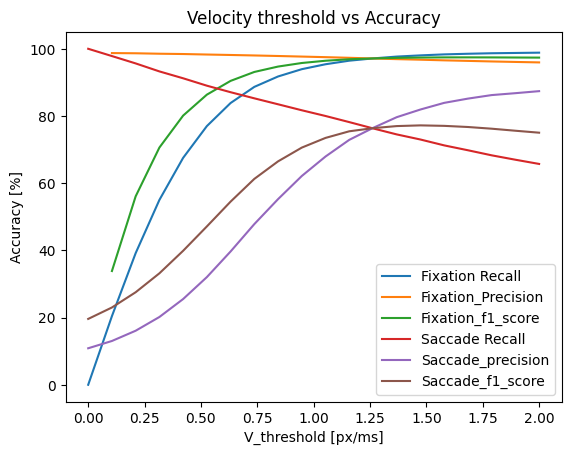

In [47]:
plt.plot(thresholds, fixation_recall, label="Fixation Recall")
plt.plot(thresholds, fixation_precision, label="Fixation_Precision")
plt.plot(thresholds, fixation_f1_score, label="Fixation_f1_score")
plt.plot(thresholds, saccade_recall, label="Saccade Recall")
plt.plot(thresholds, saccade_precision, label="Saccade_precision")
plt.plot(thresholds, saccade_f1_score, label="Saccade_f1_score")



#plt.plot(thresholds, accuracy, label="Acuracy")
plt.xlabel("V_threshold [px/ms]")
plt.ylabel("Accuracy [%]")
plt.title("Velocity threshold vs Accuracy")
plt.legend()
plt.show()

In [45]:
print('Fixation recla=', fixation_recall)
print('saccade acuracy=', saccade_recall)

Fixation recla= [0.0, 85.68543360095747, 97.51408766768064, 98.84389700626673]
saccade acuracy= [100.0, 86.41259885464957, 75.11589855467685, 65.7281156258522]
